In [69]:
# all the imports
import pandas as pd
import matplotlib.pyplot as plt

# Thimo's
import requests
import random as rnd
import datetime, time
import re

import numpy as np

First, the noise produced by the function generator has to be determined. For this, we chose different settings with varying attenuation [0 dB, 20 dB, 40 dB] and frequencies [5 Hz, 40 Hz]. The displayed sinus' are the result using the Voltcraft FG-506 function generator in combination with a Rhode & Scharz Oscillator HMO 1524. Due to the update/save implementation of the oscillator, some sudden jumps could not be prevented (eg. TRC04.csv).


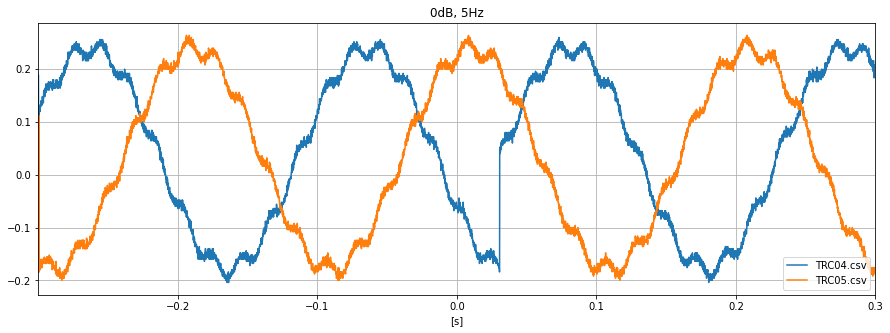

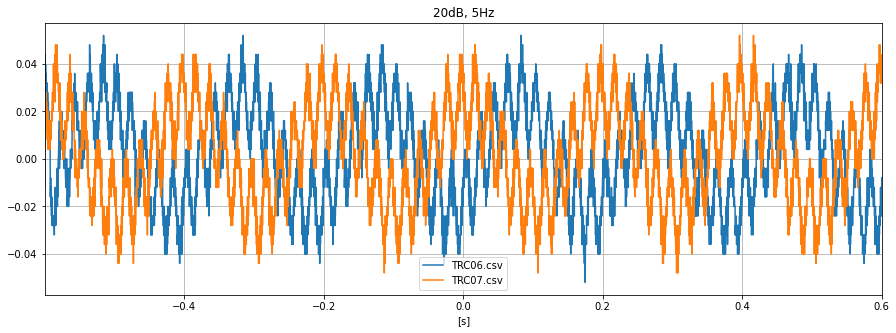

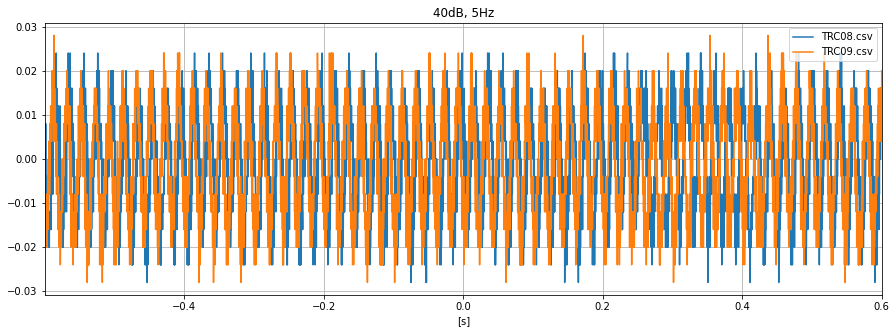

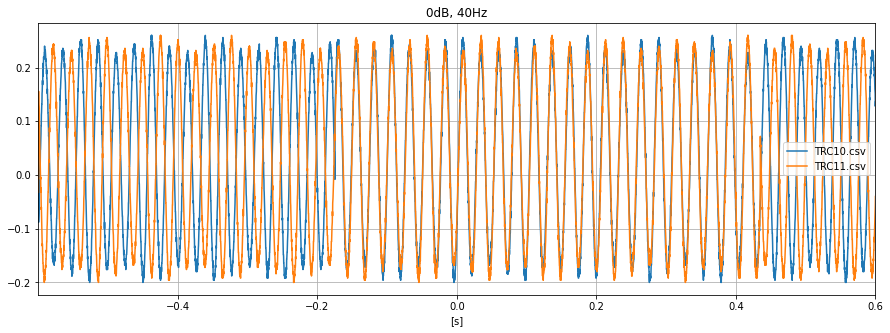

In [68]:
def display_two_complete(filename1, filename2, title):
    '''
    Displays the two rounds of test we need with each setting combination in a graph
    -------------------------------------------------------------------------------
    filename1 (string): name of the first file as a string, has to be in same folder
    filename2 (string): name of the second file as a string, has to be in same folder
    title (string): specification of attenuation and frequency 
    '''
    df1 = pd.read_csv(filename1, index_col=0).rename(columns = {'CH1[V]':filename1})
    df2 = pd.read_csv(filename2, index_col=0).rename(columns = {'CH1[V]':filename2})
    df = df1.join(df2[filename2])
    df.plot(y=[filename1,filename2], use_index = True, grid=True , title = title, figsize=(15,5))
    
display_two_complete('TRC04.csv','TRC05.csv', "0dB, 5Hz" )
display_two_complete('TRC06.csv','TRC07.csv', "20dB, 5Hz")
display_two_complete('TRC08.csv','TRC09.csv', "40dB, 5Hz")
display_two_complete('TRC10.csv','TRC11.csv', "0dB, 40Hz")

The noise level of all sinus' is high, the curve is not crystal clear and that's a problem. The reason might be the electronic noise from the powerline or the train. Not too great because testing how much noise the Traumschreiber produces/measures is difficult if there is so much noise to begin with. But we can take the difference and get the absolut value. Nice, nice. Cool, cool. Let's do that!  

C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_t

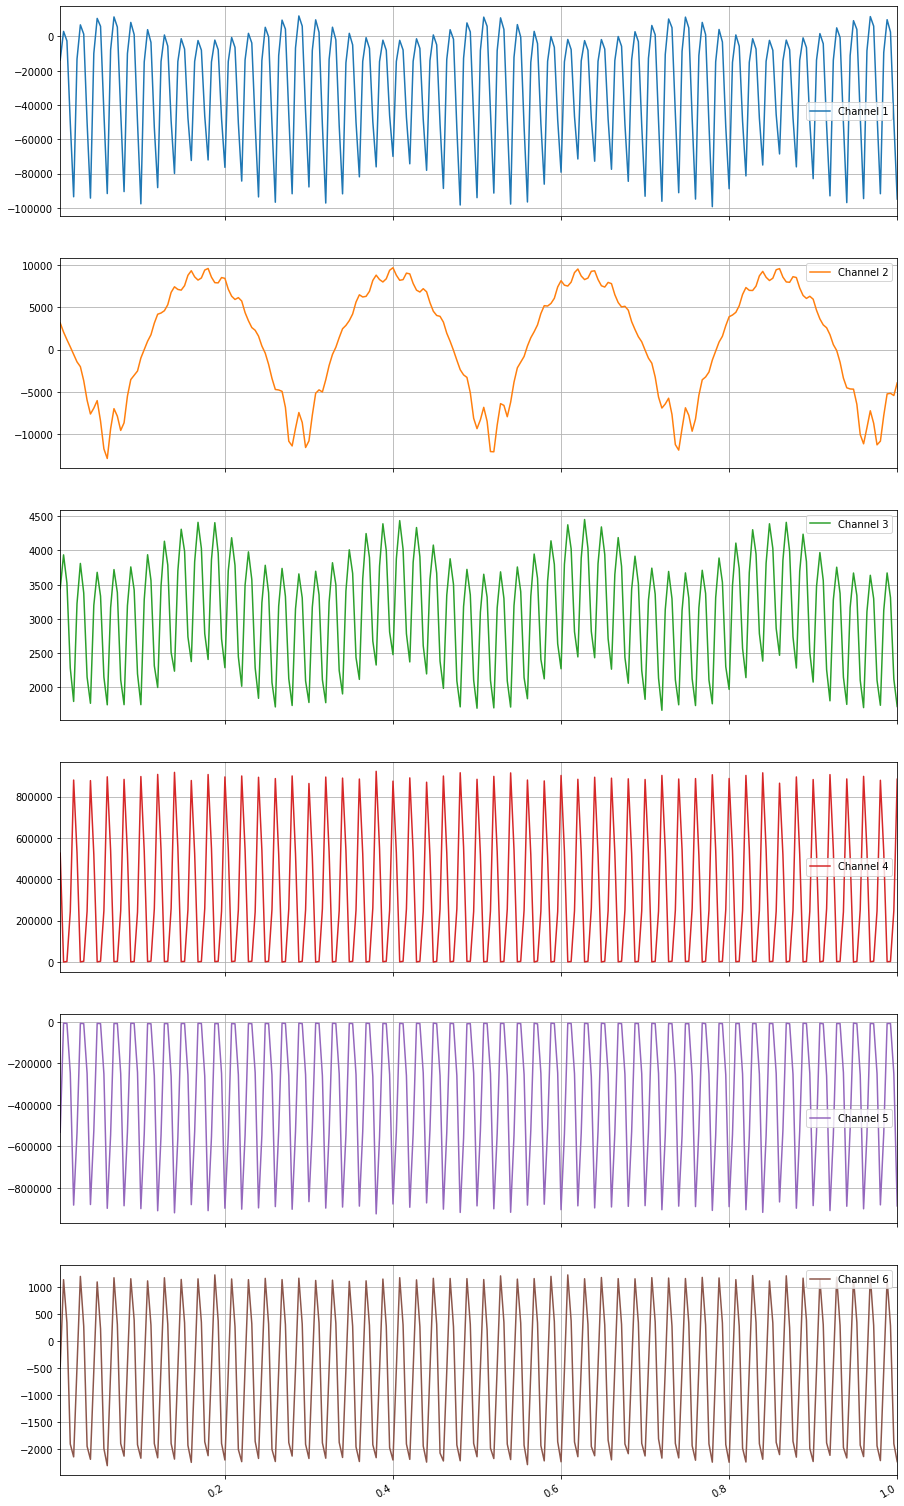

In [130]:
# import the data we measured with the Traumschreiber

exp1 =  pd.read_csv("20200709-11h57EEGrecording.csv")#, index_col=0)
exp2 =  pd.read_csv("20200709-12h01EEGrecording.csv")
exp3 =  pd.read_csv("20200709-12h04EEGrecording.csv")
exp4 =  pd.read_csv("20200709-12h12EEGrecording.csv")
exp5 =  pd.read_csv("20200709-12h23EEGrecording.csv")
exp6 =  pd.read_csv("20200709-12h25EEGrecording.csv")
exp7 =  pd.read_csv("20200709-12h31EEGrecording.csv")
exp8 =  pd.read_csv("20200709-12h34EEGrecording.csv")
exp9 =  pd.read_csv("20200709-12h43EEGrecording.csv")


# find out what channels are actually displayed 
# maybe devide evrything by 298 (nV) 
# tidy up overleaf file
# read thomas' code
# repeat the whole experiment with Paria's board
# Test the App
def displayAllTheChannels(file):
    file = file.loc[0.004:1.004]
    file.rename(columns={'Unnamed: 1':'Channel 1', 'Unnamed: 2':'Channel 2', 'Unnamed: 3':'Channel 3', 'Unnamed: 4':'Channel 4', 'Unnamed: 5':'Channel 5', 'Unnamed: 6':'Channel 6'}, inplace=True )
    file.plot(y=["Channel 1", "Channel 2" , "Channel 3" , "Channel 4" , "Channel 5", "Channel 6" ], grid=True , figsize=(15,30), subplots=True, layout=(6,1))

    
displayAllTheChannels(exp9)